# UpGrad: Lending Club Case Study
##### Editors: Sowmily Dutta and Shounak Dutta

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("loan.csv", low_memory=False)
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
df.head().T

,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1296599,1314167,1313524,1277178,1311748
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5


In [4]:
df.shape

(39717, 111)

In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
# Check for total percentage of null values in each column 
100*(df.isnull().sum()/df.shape[0])

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

In [7]:
# Removing columns having 70% and more null values.
missing_threshold = 0.7 * len(df)
df_cleaned = df.dropna(thresh=missing_threshold, axis=1)

# Removing columns which are not required for this analysis.
not_reqd = ["member_id","policy_code","url","zip_code","emp_title","title","last_pymnt_d",
            "out_prncp","out_prncp_inv","revol_bal","pymnt_plan","issue_d","initial_list_status","application_type",
            "acc_now_delinq", "delinq_amnt"]
df_cleaned = df_cleaned.drop(not_reqd,axis=1)

In [8]:
# The applicants with loan_status = current indicate already approved applications. 
# So, can be ignored for the current analysis
# Dropping all the records with loan_status = current
df_cleaned = df_cleaned[df_cleaned['loan_status'] != 'Current']

In [9]:
# Check for total percentage of null values in each column after cleaning data.
100*(df_cleaned.isnull().sum()/df_cleaned.shape[0])

id                            0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    2.677761
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
loan_status                   0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_util                    0.129611
total_acc                     0.000000
total_pymnt                   0.000000
total_pymnt_inv          

In [10]:
# Filling the null values for emp_length column with 0 assuming that the borrower hasn't worked many years for his data 
# to be recorded. Also, using regex to extract the number of years from all of the data.
df_cleaned['emp_length'].fillna(value=0,inplace=True)
df_cleaned['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df_cleaned['emp_length'] = pd.to_numeric(df_cleaned['emp_length'], errors='coerce')

In [11]:
# Replacing percentage sign in revol_util column and converting the column to a float point data type.
df_cleaned["revol_util"].replace(r'%', '', regex=True, inplace=True)
df_cleaned['revol_util'] = pd.to_numeric(df_cleaned['revol_util'], errors='coerce')

In [12]:
# Replacing percentage sign in int_rate column and converting the column to a float point data type.
df_cleaned["int_rate"].replace(r'%', '', regex=True, inplace= True)
df_cleaned['int_rate'] = df_cleaned['int_rate'].replace('N/A', pd.NA)
df_cleaned['int_rate'] = df_cleaned['int_rate'].astype(float)

In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   loan_amnt                   38577 non-null  int64  
 2   funded_amnt                 38577 non-null  int64  
 3   funded_amnt_inv             38577 non-null  float64
 4   term                        38577 non-null  object 
 5   int_rate                    38577 non-null  float64
 6   installment                 38577 non-null  float64
 7   grade                       38577 non-null  object 
 8   sub_grade                   38577 non-null  object 
 9   emp_length                  38577 non-null  int64  
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  loan_status                 38577 no

In [14]:
df_cleaned.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38527.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38521.0,38521.0,37880.000000,38538.0
mean,6.763787e+05,11047.025430,10784.058506,10222.481123,11.932219,322.466318,4.925526,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,48.702777,22.052648,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.0,0.0,0.043479,0.0
std,2.092639e+05,7348.441646,7090.306027,7022.720644,3.691327,208.639215,3.453921,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,28.364741,11.425861,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.0,0.0,0.204583,0.0
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,5.120330e+05,5300.000000,5200.000000,5000.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,25.200000,13.000000,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.0,0.0,0.000000,0.0
50%,6.564230e+05,9600.000000,9550.000000,8733.440000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,49.100000,20.000000,9674.048405,9066.660000,8000.000000,1300.450000,0.000000,0.000000,0.000000,568.260000,0.0,0.0,0.000000,0.0
75%,8.291460e+05,15000.000000,15000.000000,14000.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,72.300000,29.000000,16136.952430,15329.780000,13175.000000,2671.980000,0.000000,0.000000,0.000000,3447.250000,0.0,0.0,0.000000,0.0
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,99.900000,90.000000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,2.000000,0.0


In [15]:
df_cleaned.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,83.7,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,0.0,0.0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,9.4,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.0,0.0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,98.5,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,0.0,0.0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,0.0,0.0,0.0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,28.3,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,Jan-16,0.0,0.0,0.0,0.0


## Univariate Analysis

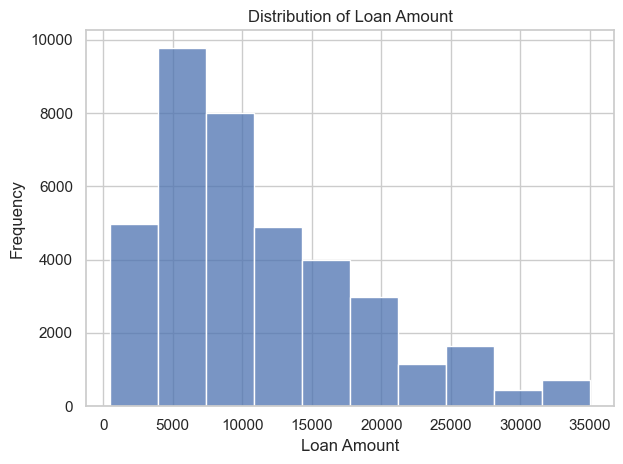

In [17]:
# Figure 1: Plot the distribution of loan amount
sns.histplot(df_cleaned["loan_amnt"], bins=10)
plt.title("Distribution of Loan Amount")
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Insights from the Loan Amount Distribution Graph
- The majority of loans are concentrated in the lower to mid-range amounts, with a significant portion falling between 5,000 and 15,000.
- There is a clear rightward skew, indicating that a smaller number of loans are for significantly higher amounts.

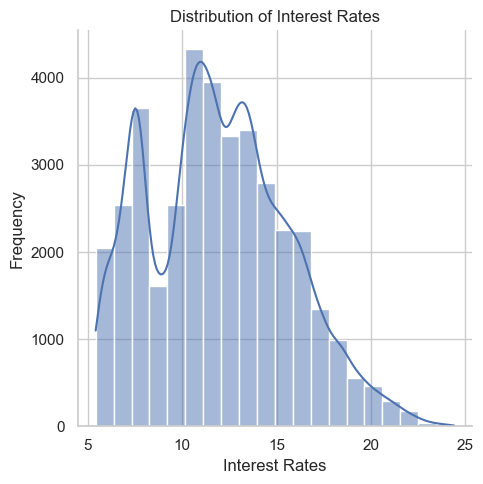

In [19]:
# Figure 2: Plot the distribution of interest rates
sns.displot(df_cleaned["int_rate"], bins=20, kde=True)
plt.title("Distribution of Interest Rates")
plt.xlabel('Interest Rates')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Insights from the Interest Rate Distribution Graph
- Interest rates exhibit a clear rightward skew, indicating that a larger portion of loans have lower interest rates.
- There is a noticeable peak around the 10-12% range, suggesting this is a common interest rate range for loans.

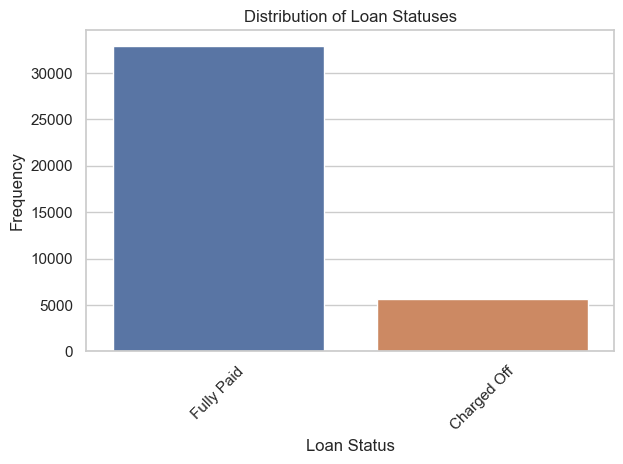

In [21]:
# Figure 3: Plot the distribution of Loan Status
sns.countplot(data=df_cleaned, x='loan_status', order=df_cleaned['loan_status'].value_counts().index)
plt.title('Distribution of Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights from the Loan Status Distribution Graph
- The majority of loans were fully paid, with a significantly smaller portion being charged off. This suggests that the majority of borrowers were able to repay their loans, but a considerable number defaulted.

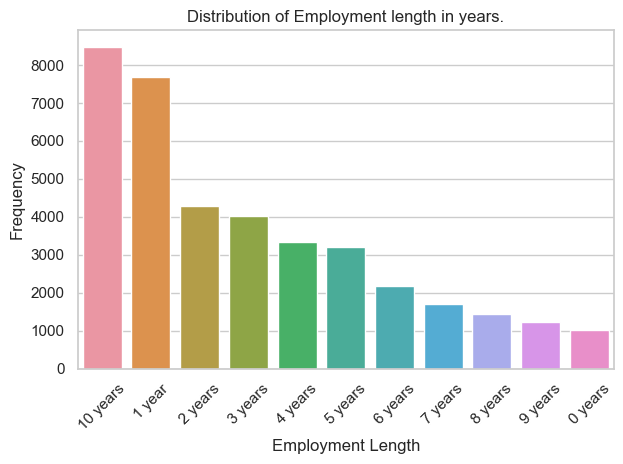

In [23]:
# Figure 4: Plot the distribution of Employment length in years
current_labels = df_cleaned['emp_length'].value_counts().index
sns.countplot(data=df_cleaned, x='emp_length', order=current_labels)
plt.title('Distribution of Employment length in years.')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
formatted_labels = [f'{label} year' if label == 1 else f'{label} years' for label in current_labels]
plt.xticks(ticks=range(len(current_labels)), labels=formatted_labels, rotation=45)
plt.tight_layout()
plt.show()

### Insights from the Employment Length Distribution Graph
- The majority of borrowers have been employed for 10 years or less, with a significant portion having been employed for less than 5 years.
- Employment length decreases as the number of years increases, indicating that a larger portion of borrowers have been employed for shorter durations.

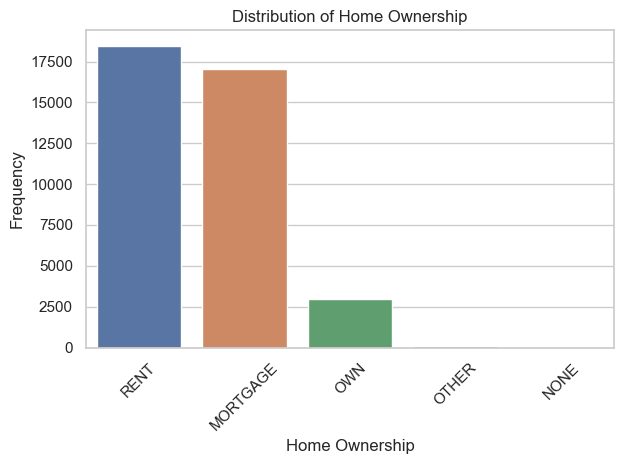

In [25]:
# Figure 5: Plot the distribution of Home Ownership
current_labels = df_cleaned['home_ownership'].value_counts().index
sns.countplot(data=df_cleaned, x='home_ownership', order=current_labels)
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights from the Home Ownership Distribution Graph 
- The majority of borrowers are renters, followed by those with a mortgage.
- A smaller portion of borrowers own their homes outright, while even fewer have other or no home ownership status.

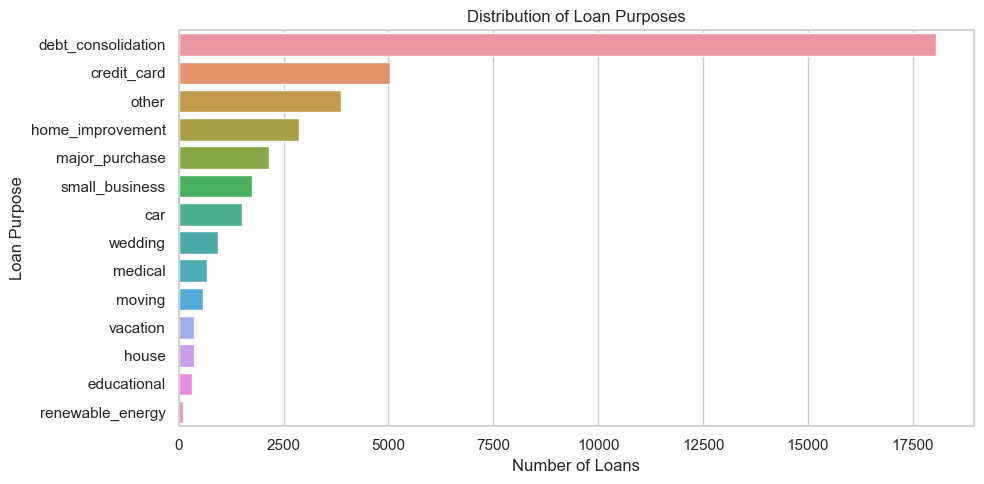

In [27]:
# Figure 6: Plot the distribution of Loan Purpose
loan_purpose_counts = df_cleaned['purpose'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=loan_purpose_counts.values, y=loan_purpose_counts.index)
plt.title('Distribution of Loan Purposes')
plt.xlabel('Number of Loans')
plt.ylabel('Loan Purpose')
plt.tight_layout()
plt.show()

### Insights from the Loan Purpose Distribution Graph
- Debt consolidation is the most common loan purpose, followed by credit card and other purposes.
- Home improvement, major purchases, and small businesses are also significant categories for loans.
- A variety of other purposes, such as weddings, medical expenses, moving, vacation, house, education, and renewable energy, are less frequent but still represented.

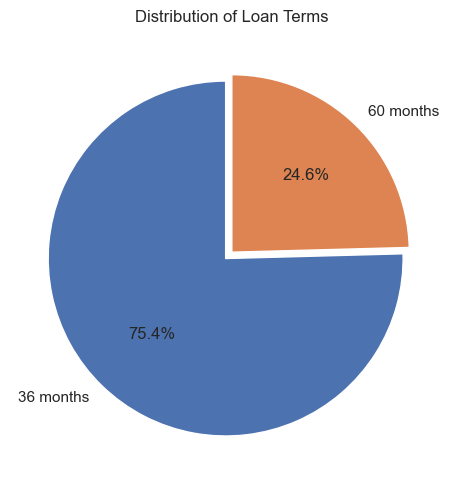

In [29]:
# Figure 7: Plot the distribution of Loan Terms
plt.figure(figsize=(5, 5))
plt.title('Distribution of Loan Terms')  
term_counts = df_cleaned.term.value_counts()
plt.pie(x=term_counts, autopct='%1.1f%%', startangle=90, explode=(0.05, 0), labels=['36 months', '60 months'])
plt.ylabel('')  
plt.tight_layout()
plt.show()

### Insights from the Loan Term Distribution Graph
- The majority of loans, 75.4% of the total, have a term of 36 months.
- Only 24.6% of loans have a term of 60 months.

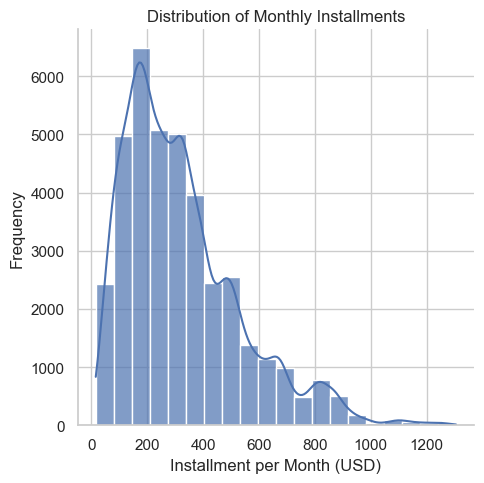

In [31]:
# Figure 8: Plot the Distribution of Monthly Installments  
sns.displot(df_cleaned["installment"], bins=20, alpha=0.7, kde=True)
plt.title('Distribution of Monthly Installments')
plt.xlabel('Installment per Month (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Insights from the Monthly Installments Distribution Graph
- The distribution of monthly installments is heavily right-skewed, indicating that a larger number of borrowers have lower installment amounts.
- The most common monthly installment amount falls within 200-300 USD range.

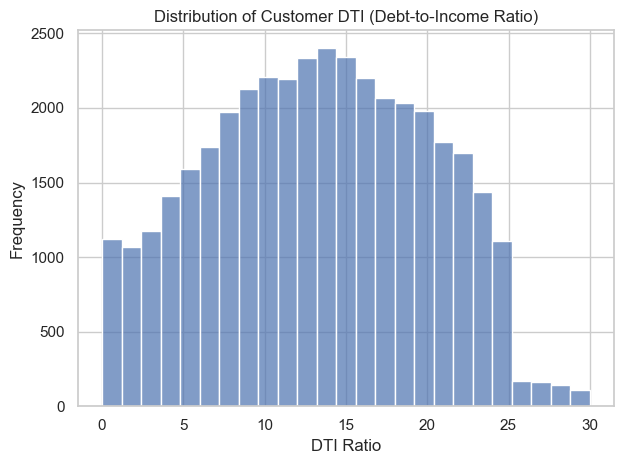

In [33]:
# Figure 9: Plot the Distribution of Customer DTI ratio
sns.histplot(df_cleaned["dti"], bins=25, alpha=0.7)
plt.title('Distribution of Customer DTI (Debt-to-Income Ratio)')  
plt.xlabel('DTI Ratio')  
plt.ylabel('Frequency')  
plt.tight_layout()
plt.show()

### Insights from the Customer DTI Ratio Distribution Graph
- The distribution of customer DTI ratios is right-skewed. Thus a larger number of borrowers have lower DTI ratios.
- There is a peak around the 10-15 range, suggesting this is the most common DTI ratio among borrowers.

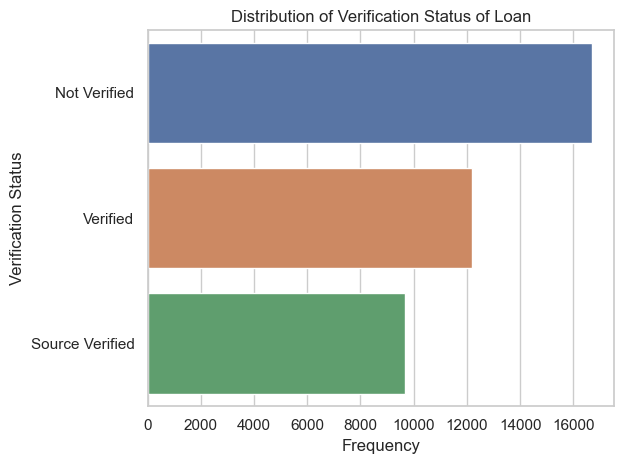

In [35]:
# Figure 10: Plot the Verification Status of Loan
verify_counts = df_cleaned["verification_status"].value_counts()
verify_labels = df_cleaned["verification_status"].value_counts().index
sns.barplot(y=verify_labels, x=verify_counts)
plt.title('Distribution of Verification Status of Loan')  
plt.xlabel('Frequency')
plt.ylabel('Verification Status')
plt.tight_layout()
plt.show()

### Insights from the Verification Status Distribution Graph
- The majority of loans were not verified, followed by verified loans. Source verified loans represent a significantly smaller portion.

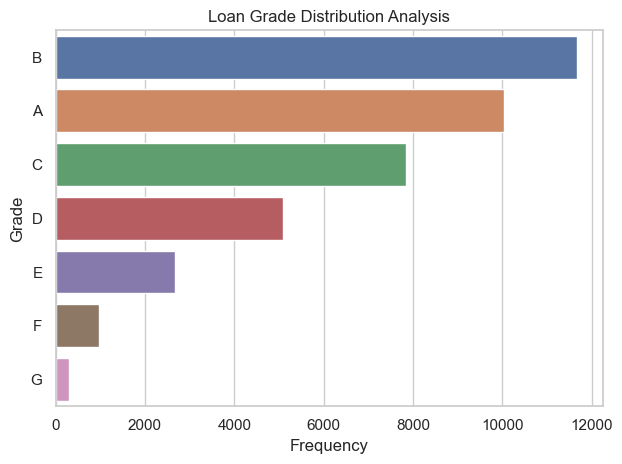

In [37]:
# Figure 11: Plot the Loan Grade Analysis
grade_counts = df_cleaned["grade"].value_counts()
grade_labels = df_cleaned["grade"].value_counts().index
sns.barplot(y=grade_labels, x=grade_counts)
plt.title('Loan Grade Distribution Analysis')
plt.xlabel('Frequency')
plt.ylabel('Grade')
plt.tight_layout()
plt.show()

### Insights from the Loan Grade Distribution Graph
- Grade B loans are the most frequent, followed by grade A loans.
- The frequency of loans decreases as the grade letter moves from D to G possibly because a higher risk is associated with lower grades.

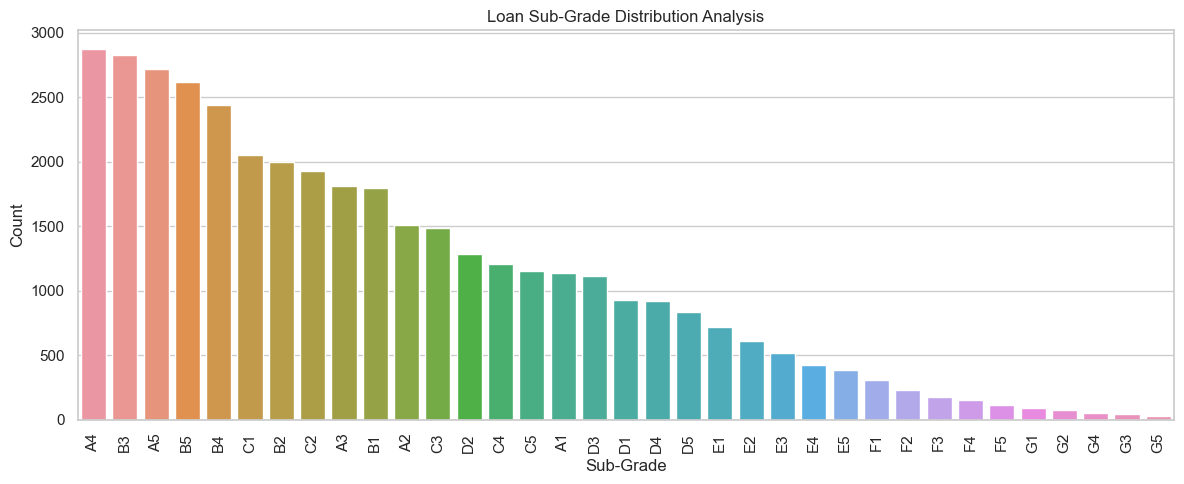

In [39]:
# Figure 12: Plot the Sub-Grade Distribution
plt.figure(figsize=[12, 5])
plt.title('Loan Sub-Grade Distribution Analysis')  
sub_grade_counts = df_cleaned["sub_grade"].value_counts()
sub_grade_labels = df_cleaned["sub_grade"].value_counts().index
sns.barplot(x=sub_grade_labels, y=sub_grade_counts)
plt.xlabel('Sub-Grade')  
plt.ylabel('Count')  
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

### Insights from the Loan Sub-Grade Distribution Graph
- The distribution of loan sub-grades is skewed to the right. A larger number of loans fall into the higher sub-grades (A1-A5).
- The most frequent sub-grade is A1, followed by A2 and A3, further emphasizing the concentration of loans in the higher sub-grades. There is a clear decrease in the number of loans as the sub-grade moves from A1 to G5.

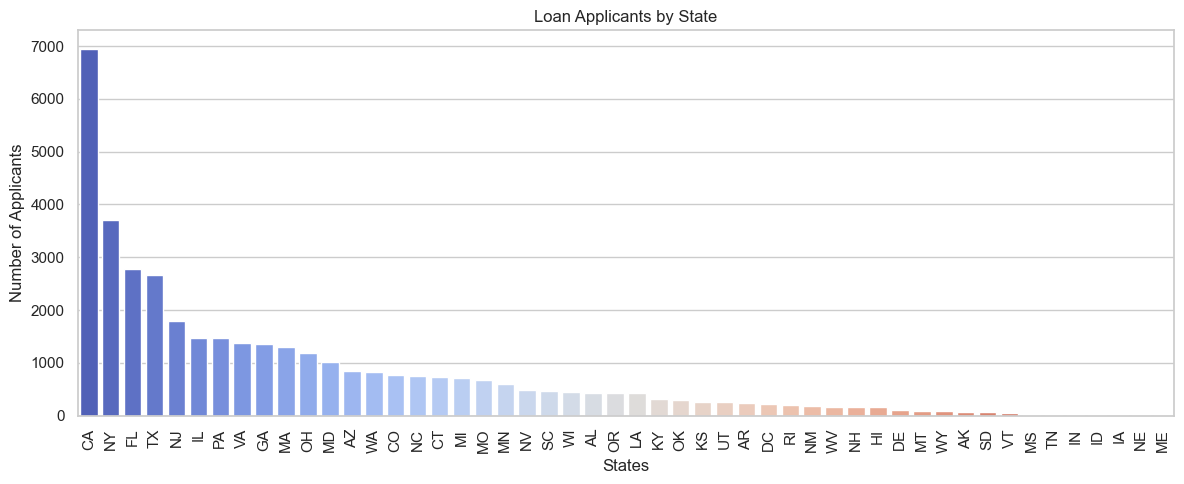

In [41]:
# Figure 13: Plot the State Distribution for Loan Applicants
plt.figure(figsize=[12, 5])
plt.title('Loan Applicants by State')
sns.countplot(x=df_cleaned["addr_state"], palette='coolwarm', order=df_cleaned["addr_state"].value_counts().index)
plt.xlabel('States')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insights from the Loan Applicants by State Distribution Graph
- California (CA) has the highest number of loan applicants, followed by New York (NY) and Florida (FL).

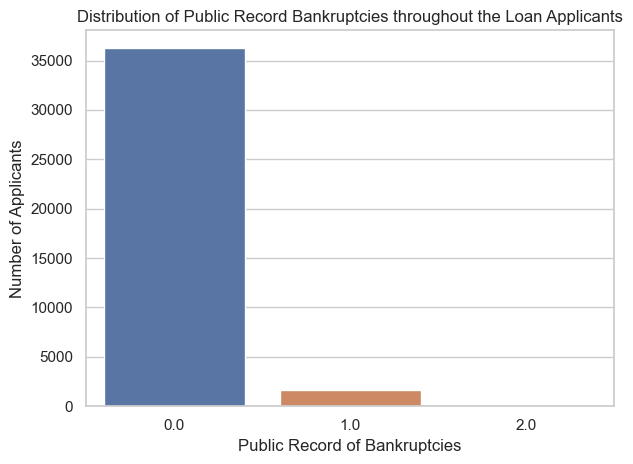

In [43]:
# Figure 14: Plot the Public Record Bankruptcies Distribution for Loan Applicants
plt.title('Distribution of Public Record Bankruptcies throughout the Loan Applicants')
sns.countplot(data=df_cleaned, x="pub_rec_bankruptcies", order=df_cleaned["pub_rec_bankruptcies"].value_counts().index)
plt.xlabel('Public Record of Bankruptcies')
plt.ylabel('Number of Applicants')
plt.tight_layout()
plt.show()

### Insights from the Public Record Bankruptcies Distribution Graph
- The vast majority of loan applicants have no public record bankruptcies. Only a small number of applicants have one or two public record bankruptcies.
- Bankruptcies are a relatively rare occurrence among the loan applicants in this dataset.

## Key Insights from the Univariate Analysis of Loan Data
- Loan Amounts: The majority of loans are for lower to mid-range amounts, with a significant portion falling between 5,000 and 15,000. There is a clear rightward skew, indicating larger loans are less frequent.
- Interest Rates: Interest rates are generally lower, with a noticeable peak around 10-12%. The distribution is skewed to the right, indicating more loans have lower rates.
- Loan Statuses: Most loans were fully paid, but a considerable number were charged off.
- Employment Length: Borrowers tend to have shorter employment lengths, with most employed for 10 years or less.
- Home Ownership: Renters are the most common, followed by mortgage holders. Homeowners are a smaller group.
- Loan Purposes: Debt consolidation is the primary purpose, followed by credit cards and home improvements.
- Loan Terms: 36-month terms are significantly more common than 60-month terms.
- Customer DTI: Borrowers generally have lower DTI ratios, with a peak around 10-15.
- Monthly Installments: Most borrowers have lower monthly installments, with a peak around 200-300 USD.
- Verification Status: Many loans are not verified, while some are verified or source verified.
- Loan Grades: Higher grades (A-B) are more common than lower grades (C-G), indicating lower risk borrowers.
- Loan Sub-Grades: The distribution of sub-grades is skewed to the right, with more loans in higher sub-grades (A1-A5).
- State Distribution: California, New York, and Florida have the highest number of loan applicants, with most states having fewer than 1,000 applicants.
- Public Record Bankruptcies: Very few applicants have public record bankruptcies, with the majority having none.

## Segmented Univariate Analysis

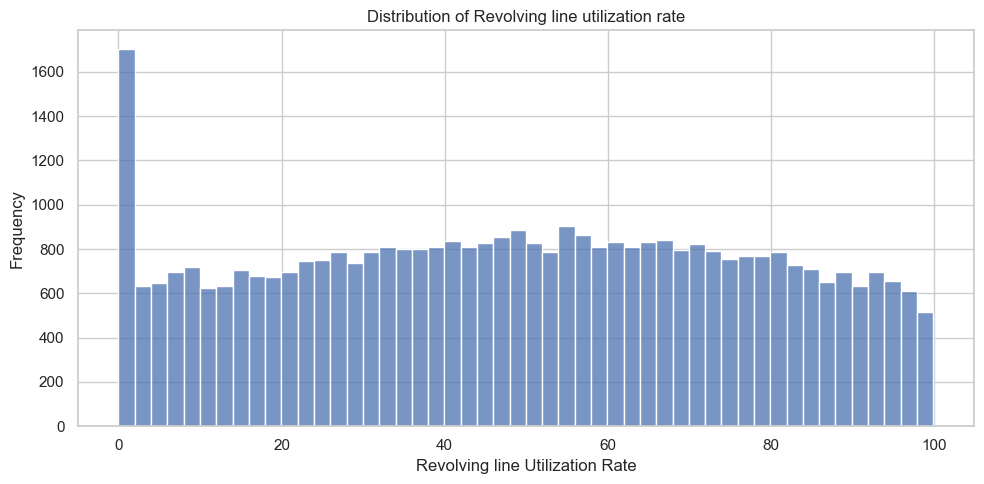

In [47]:
# Figure 15: Plot the Distribution of Revolving line utilization rate
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned["revol_util"], bins=50)
plt.title('Distribution of Revolving line utilization rate')
plt.xlabel('Revolving line Utilization Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [48]:
# Segmenting Interest Rates into Low, Medium and High Interest Rates
df_cleaned['int_rate_segments'] = pd.qcut(x=df_cleaned.int_rate, q=[0, 0.33, 0.66, 1], labels=["Low", "Medium", "High"])

# Segmenting Annual Incomes into Tier 1, Tier2 and Tier 3 Annual Incomes
# Tier 1 = Low Income, Tier 2 = Medium Income, Tier 3 = High Income
df_cleaned['annual_inc_segments'] = pd.qcut(x=df_cleaned.annual_inc, q=[0, 0.33, 0.66, 1], labels=["Tier 1", "Tier 2", "Tier 3"])

# Segmenting Revolving line utilization rate into Low, Medium and High Utilization
# Based on the Figure 15: Plot the Distribution of Revolving line utilization rate, which shows a right-skewed distribution  
# with a concentration of values around 0-10, median imputation would be a suitable approach for handling missing values in the revol_util column.
df_cleaned['util_status'] = pd.qcut(df_cleaned['revol_util'].fillna(df_cleaned['revol_util'].median()), q=[0, 0.33, 0.66, 1], labels=['Low Utilization', 'Moderate Utilization', 'High Utilization'])


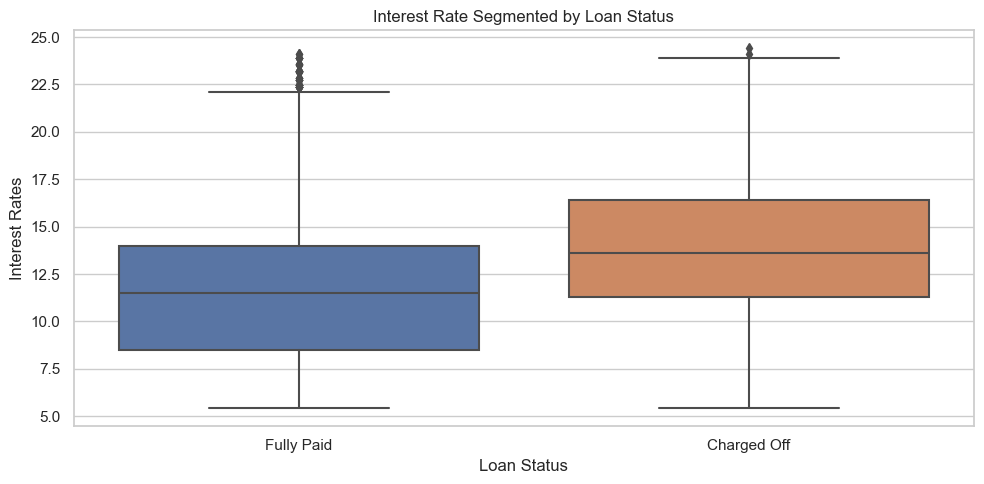

In [49]:
# Figure 16: Plot the Interest Rate Segmented by Loan Status
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned, y="int_rate" , x="loan_status")
plt.title("Interest Rate Segmented by Loan Status")
plt.xlabel('Loan Status')
plt.ylabel('Interest Rates')
plt.tight_layout()
plt.show()

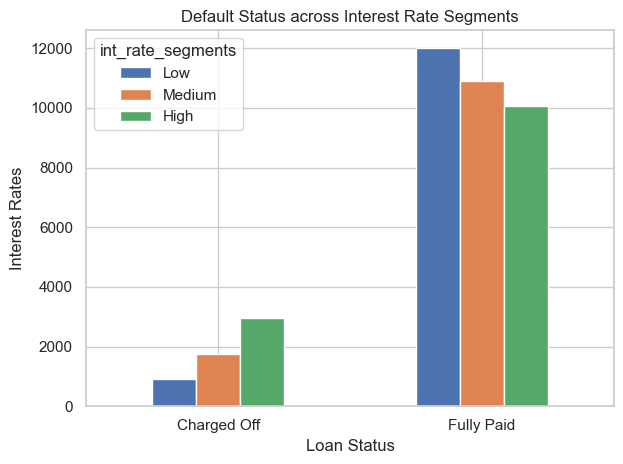

In [50]:
# Figure 17: Plot the Loan Status across Interest Rate Segments
df_cleaned.groupby('loan_status')['int_rate_segments'].value_counts().unstack().plot(kind='bar')
plt.title("Default Status across Interest Rate Segments")
plt.xticks(rotation=0)
plt.xlabel('Loan Status')
plt.ylabel('Interest Rates')
plt.tight_layout()
plt.show()

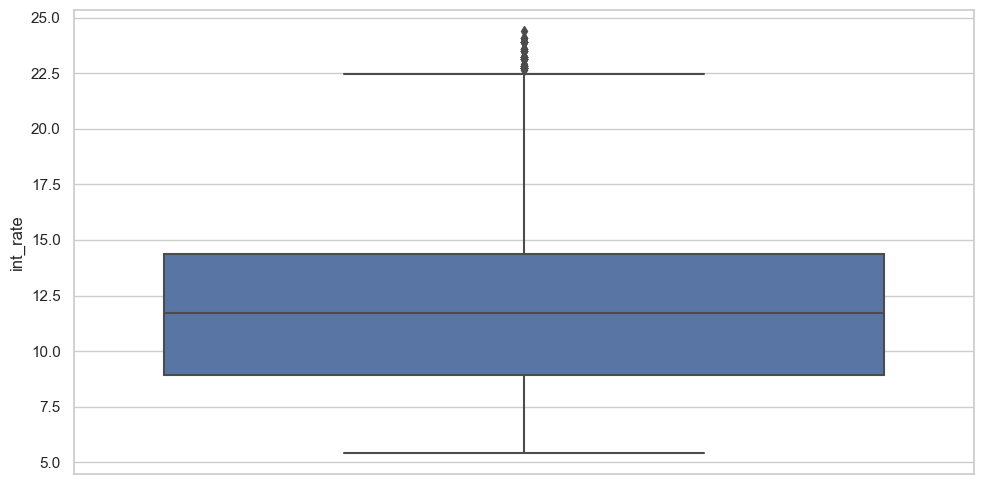

In [51]:
# Figure 18: Outlier detection for Interest Rates
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned, y="int_rate")
plt.tight_layout()
plt.show()

In [52]:
# As we observed from Figure 3: Outlier detection for Interest Rates
# that interest rates have outliers. We are removing the interest rates greater than 22.
df_cleaned = df_cleaned[df_cleaned['int_rate'] < 22]

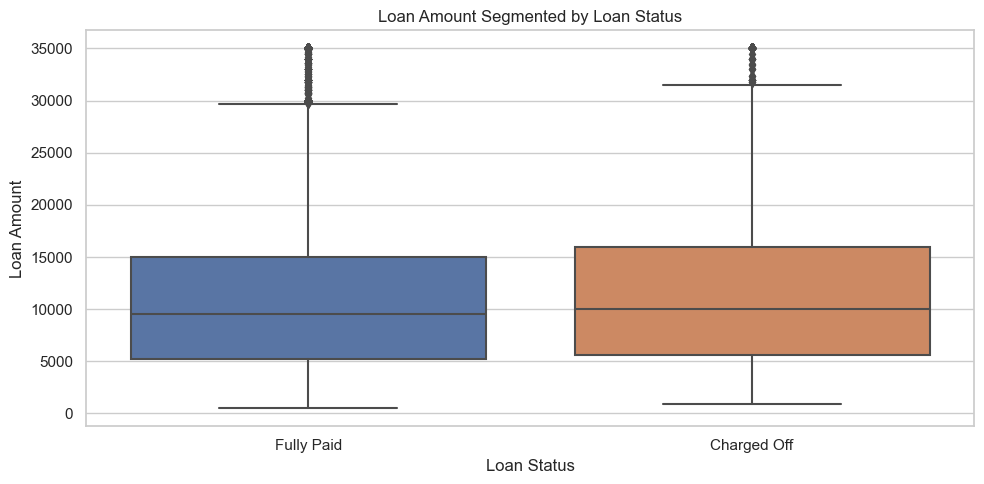

In [53]:
# Figure 19: Plot the Loan Amount by Loan Status
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned, x='loan_status', y='loan_amnt')
plt.title('Loan Amount Segmented by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.tight_layout()
plt.show()

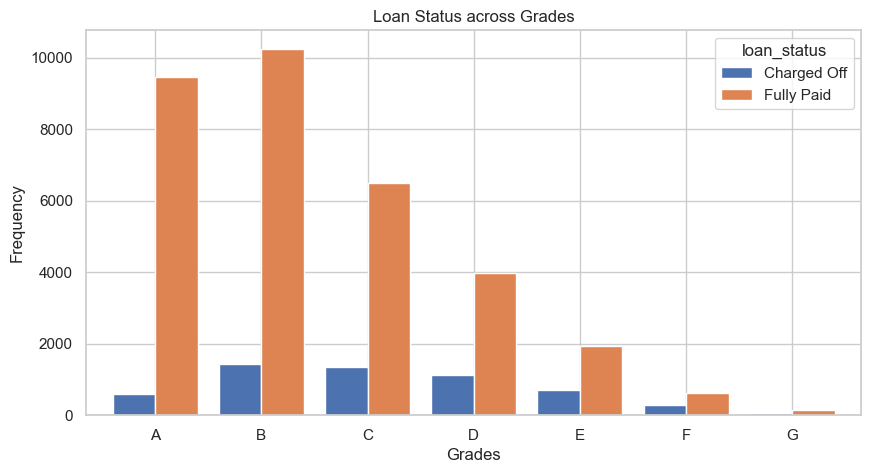

In [54]:
# Figure 20: Plot the Grade segmented by Loan Status
df_cleaned.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar', stacked=False, width=0.8, figsize=[10,5])
plt.title("Loan Status across Grades")
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

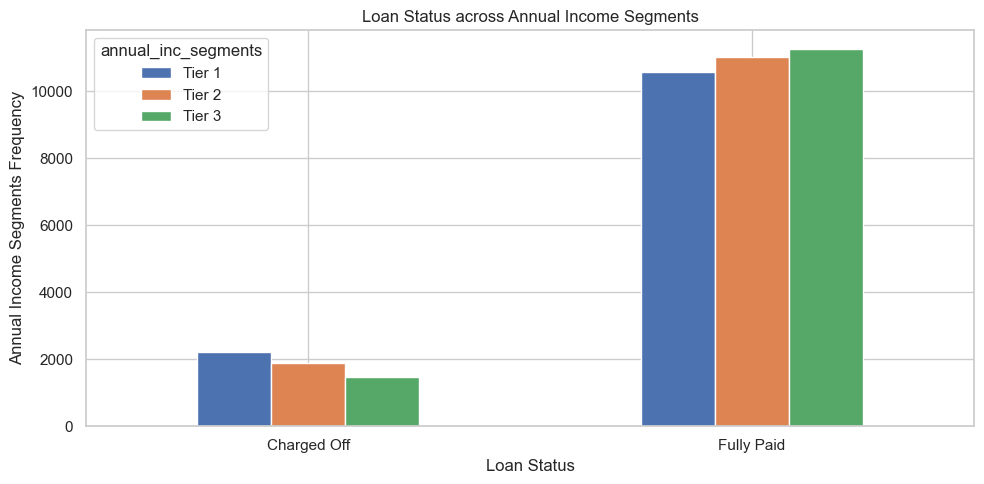

In [55]:
# Figure 21: Plot the Annual Income Segmented by Loan Status
df_cleaned.groupby('loan_status')['annual_inc_segments'].value_counts().unstack().plot(kind='bar', figsize=[10,5])
plt.title("Loan Status across Annual Income Segments")
plt.xticks(rotation=0)
plt.xlabel('Loan Status')
plt.ylabel('Annual Income Segments Frequency')
plt.tight_layout()
plt.show()

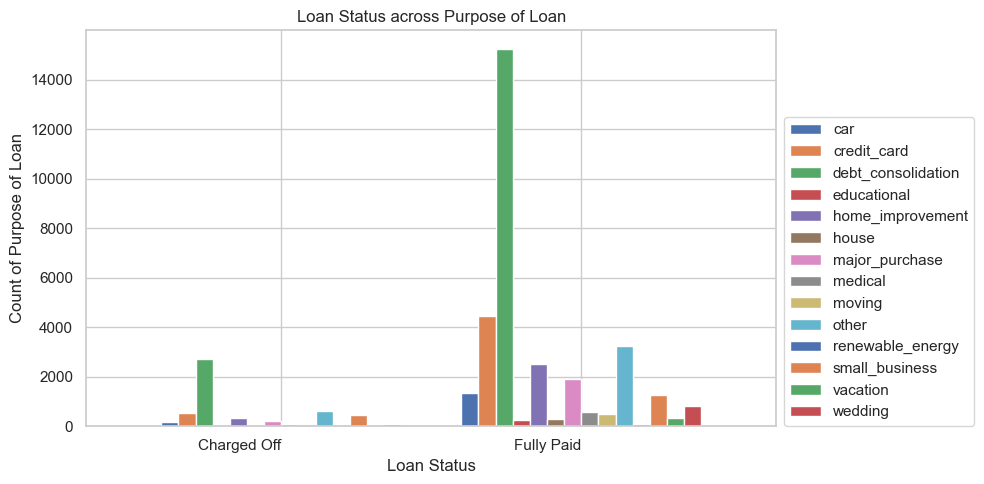

In [56]:
# Figure 22: Plot the Purpose of Loan Segmented by Loan Status
df_cleaned.groupby('loan_status')['purpose'].value_counts().unstack().plot(kind='bar', stacked= False, width=0.8, figsize=[10,5])
plt.title('Loan Status across Purpose of Loan')
plt.xlabel('Loan Status')
plt.ylabel('Count of Purpose of Loan')
plt.xticks(rotation=0, ha='right')
plt.legend(bbox_to_anchor=[1,0.8])
plt.tight_layout()
plt.show()

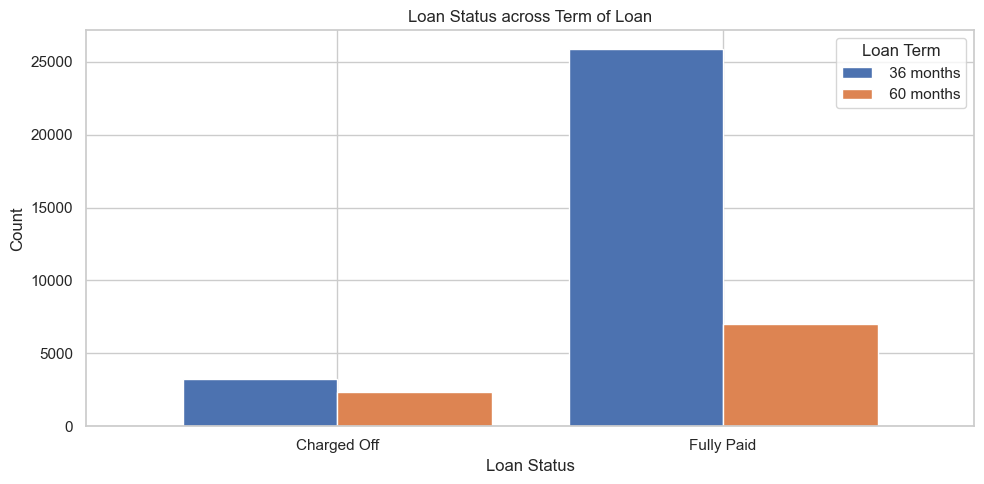

In [57]:
# Figure 23: Plot the graph between Loan_Status and Term of the loan
df_cleaned.groupby('loan_status')['term'].value_counts().unstack().plot(kind='bar', stacked=False, width=0.8, figsize=(10, 5))
plt.title('Loan Status across Term of Loan')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.legend(title='Loan Term')
plt.tight_layout()
plt.show()

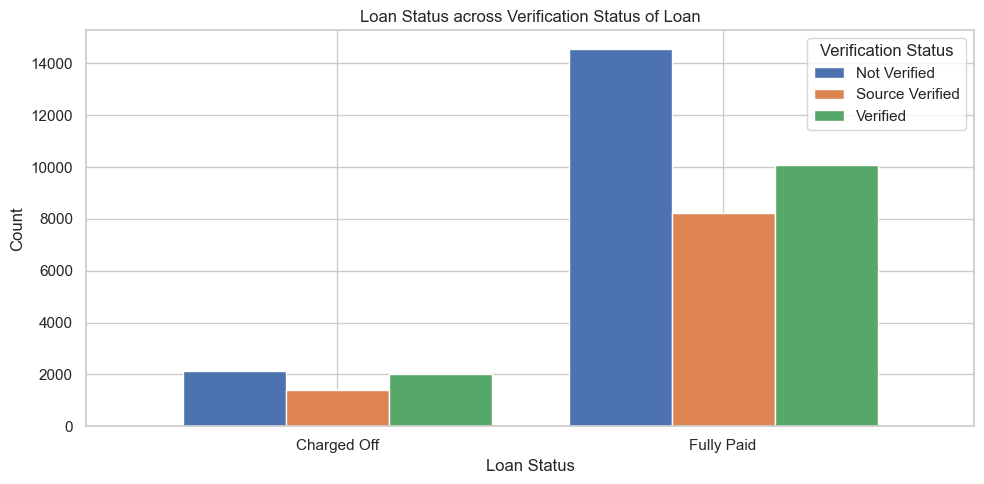

In [58]:
# Figure 24: Plot the graph between Loan_Status and Verification Status
df_cleaned.groupby('loan_status')['verification_status'].value_counts().unstack().plot(kind='bar', stacked=False, width=0.8, figsize=(10, 5))
plt.title('Loan Status across Verification Status of Loan')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Verification Status')
plt.tight_layout()
plt.show()

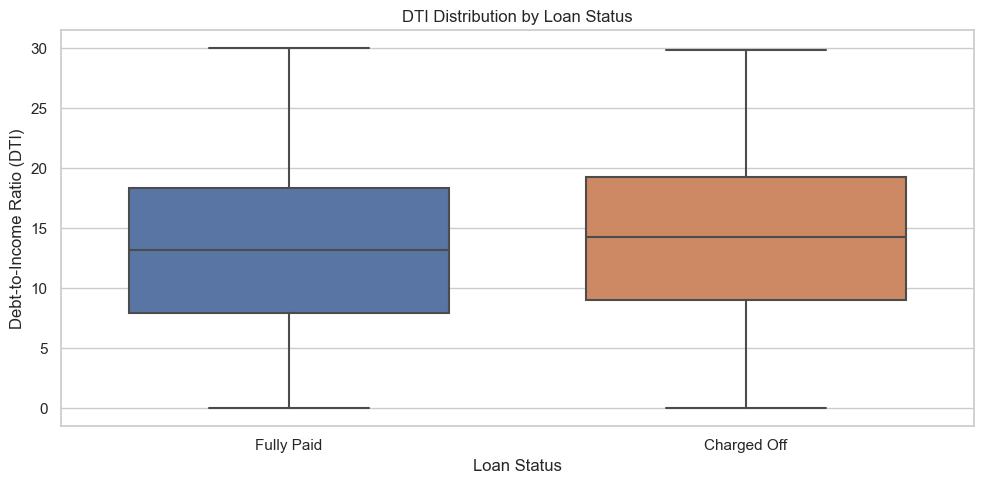

In [59]:
# Figure 25: Plot the graph between Loan_Status and DTI (Debt-to-Income ratio)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x="loan_status", y="dti", width=0.7)
plt.title('DTI Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

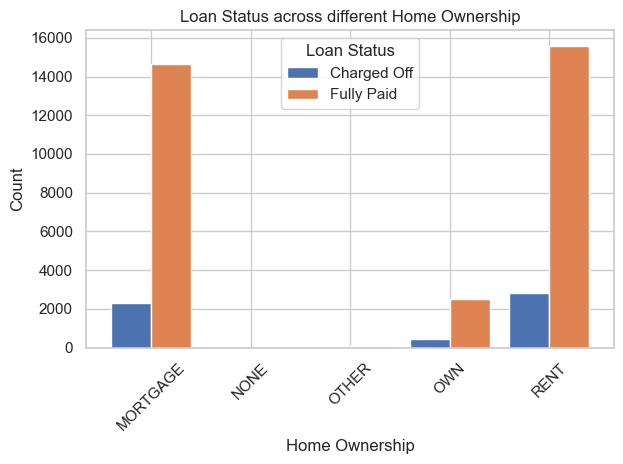

In [60]:
# Figure 25: Plot the graph between Loan_Status and Home Ownership
df_cleaned.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar', stacked=False, width=0.8)
plt.title("Loan Status across different Home Ownership")
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

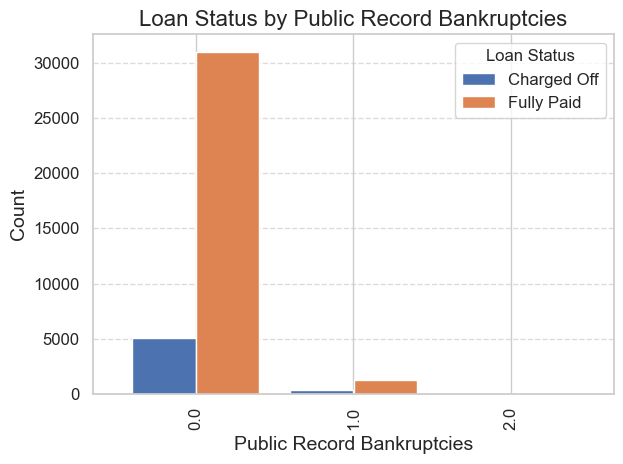

In [61]:
# Plotting the graph between Loan_Status and pub_rec_bankruptcies

# Plot grouped bar chart for 'pub_rec_bankruptcies' vs 'loan_status'
df_cleaned.groupby('pub_rec_bankruptcies')['loan_status'].value_counts().unstack().plot(kind='bar', stacked=False, width=0.8)

# Customizing the plot
plt.title('Loan Status by Public Record Bankruptcies', fontsize=16)
plt.xlabel('Public Record Bankruptcies', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # No rotation needed for bankruptcy categories
plt.yticks(fontsize=12)
plt.legend(title='Loan Status', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<!-- Annual Income   
Homeownership
Loan Status
Grade
Purpose
Emp Length
DTI
State
Verification Status
Revol Util -->

<Figure size 1000x500 with 0 Axes>

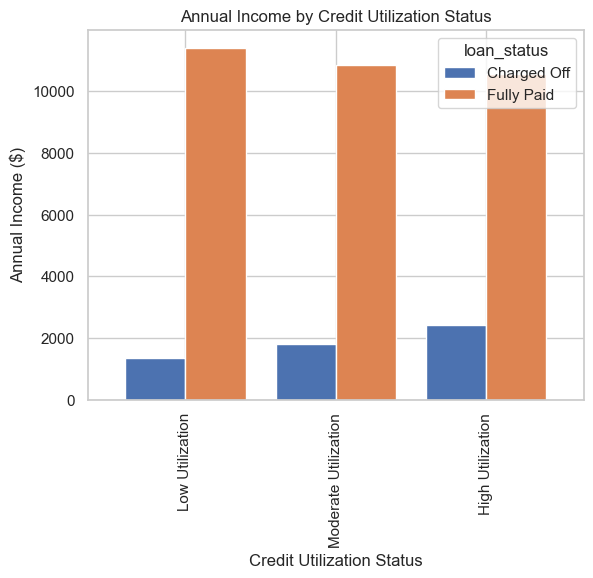

In [63]:

plt.figure(figsize=(10, 5))
df_cleaned.groupby('util_status')['loan_status'].value_counts().unstack().plot(kind='bar', stacked=False, width=0.8)
plt.title('Annual Income by Credit Utilization Status')
plt.xlabel('Credit Utilization Status')
plt.ylabel('Annual Income ($)')
plt.show()

In [64]:
# Annual Inc
# Grade - sub grade
# purpose
# Home ownership
# Revol Util
# DTI
# Verification Status
# Interest Rate
# Loan amount
# emp length 
# delinq_2yrs

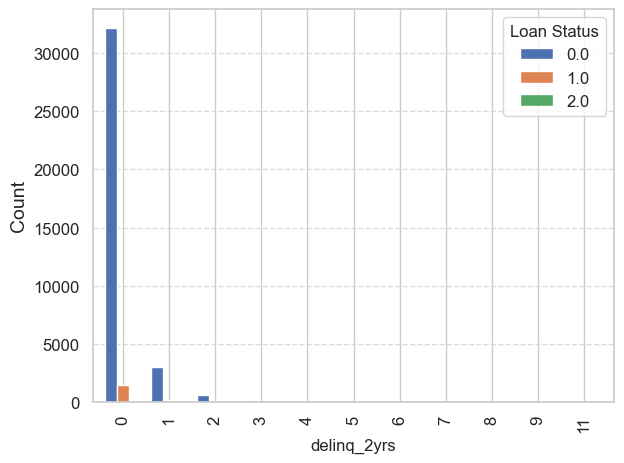

In [65]:
df_cleaned["delinq_2yrs"].value_counts()
df_cleaned.groupby('delinq_2yrs')['pub_rec_bankruptcies'].value_counts().unstack().plot(kind='bar', stacked=False, width=0.8)

plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # No rotation needed for bankruptcy categories
plt.yticks(fontsize=12)
plt.legend(title='Loan Status', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [67]:
# heatmap_data = df_cleaned.groupby('loan_status').agg({'dti': 'mean', 'annual_inc': 'mean'}).reset_index()

# plt.figure(figsize=(10, ))
# sns.heatmap(heatmap_data.set_index('loan_status').T, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Heatmap of Mean Debt-to-Income Ratio and Annual Income by Loan Status')
# plt.show()


In [70]:
# df_subset = df_cleaned[['loan_status', 'dti', 'annual_inc']]

# # Convert categorical features to numerical codes for pairplot
# # df_subset['loan_status'] = df_subset['loan_status'].astype('category').cat.codes

# g = sns.pairplot(df_subset, hue='loan_status', palette='coolwarm')
# g.set_titles("{col_name}")
# plt.suptitle('Pair Plot: Debt-to-Income Ratio and Annual Income by Loan Status', y=1.02)
# plt.show()